In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

**3.3.** Исследуйте ветвь решений системы

$$
\begin{cases}
x^4 - y^4 + \lambda xy = \lambda^2, \\
\lambda x^2 + 2\lambda y^2 - x = 1,
\end{cases}
$$

на которой при $\lambda = 0$ решение имеет вид $x = -1$, $y = 1$.

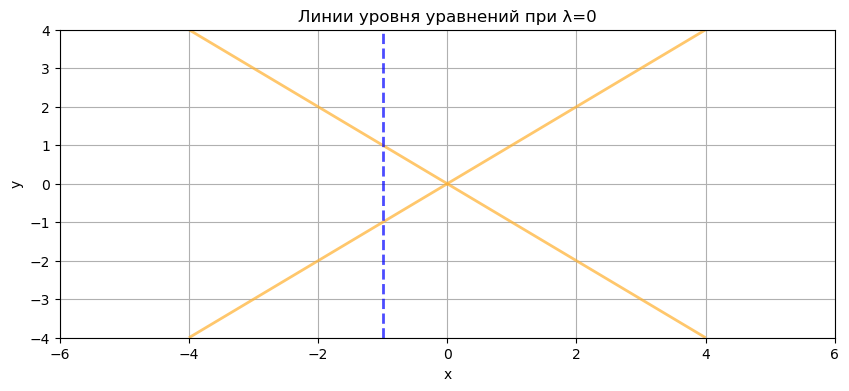

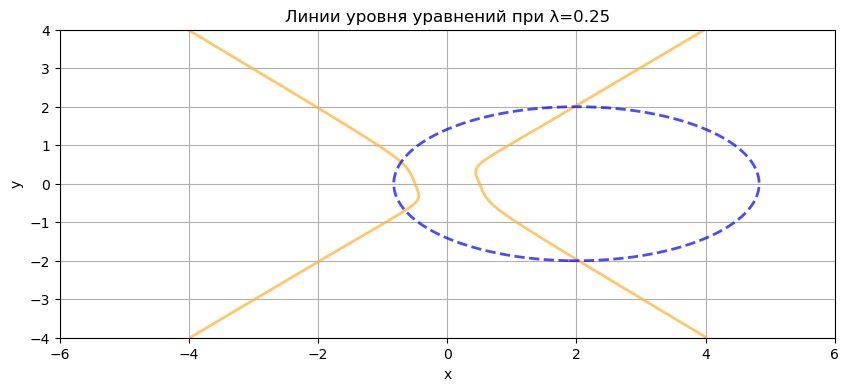

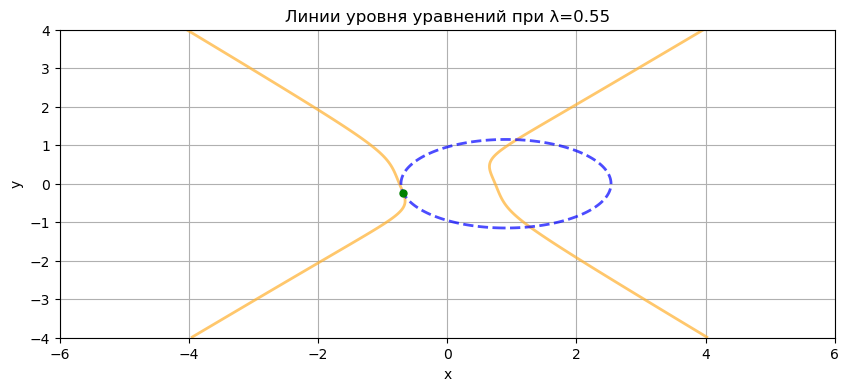

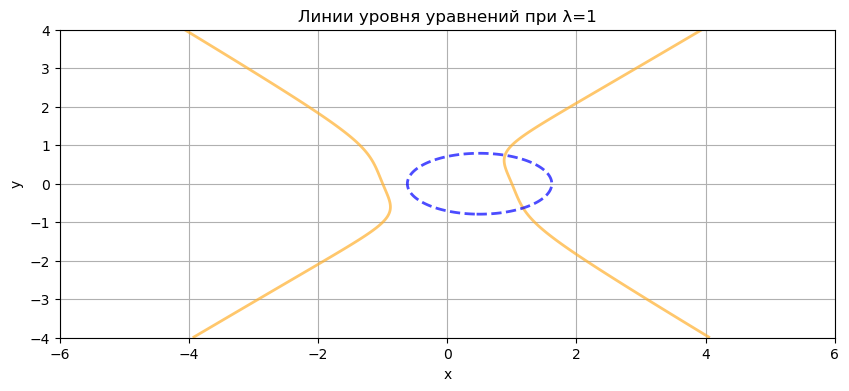

In [ ]:
def eq1(x, y, lam):
    return x**4 - y**4 + lam*x*y - lam**2
def eq2(x, y, lam):
    return lam*x**2 + 2*lam*y**2 - x - 1

def plot_contours_separate(lam_values):
    x = np.linspace(-6, 6, 1000)
    y = np.linspace(-4, 4, 1000)
    X, Y = np.meshgrid(x, y)
    
    for lam in lam_values:
        plt.figure(figsize=(10, 4))
        
        Z1 = eq1(X, Y, lam)
        Z2 = eq2(X, Y, lam)
        plt.contour(X, Y, Z1, levels=[0], linestyles='solid', linewidths=2, colors=['#ffb02e'], alpha=0.7)
        plt.contour(X, Y, Z2, levels=[0], linestyles='dashed', linewidths=2, colors=['blue'], alpha=0.7)
        if lam == 0.55:
            plt.plot(-0.678, -0.253, 'o', color='green', markersize=5)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Линии уровня уравнений при λ={lam}')
        plt.grid()
        plt.show()

lam_values = [0,0.25, 0.55,1]
plot_contours_separate(lam_values) 

In [ ]:
def J(x, y, lam):
    J11 = 4*x**3 + lam*y 
    J12 = -4*y**3 + lam*x
    J21 = 2*lam*x - 1
    J22 = 4*lam*y
    return np.array([[J11, J12], [J21, J22]])

def newton_method(lam, x0, y0, tol=1e-8, max_iter=1000):
    x, y = x0, y0
    for _ in range(max_iter):
        F = np.array([eq1(x, y, lam), eq2(x, y, lam)])
        J_mat = J(x, y, lam)
        det = np.linalg.det(J_mat)
        
        delta = np.linalg.solve(J_mat, -F)
        
        x += delta[0]
        y += delta[1]
        
        if np.linalg.norm(delta) < tol: #  Норма фробениуса
            break
    return x, y

def track_branch(lam_start, lam_end, x0, y0, step=0.01):
    lam_values = []
    x_values = []
    y_values = []
    det_values = []
    
    lam = lam_start + step if lam_start == 0 else lam_start
    x, y = newton_method(lam, x0, y0)
    
    while lam <= lam_end:
        try:
            x, y = newton_method(lam, x, y)
            det = np.linalg.det(J(x, y, lam))
            
            lam_values.append(lam)
            x_values.append(x)
            y_values.append(y)
            det_values.append(det)
            
            # Уменьшение шага при приближении к точке бифуркации
            if abs(det) < 10**(-5):
                lam += step/10
            else:
                lam += step
                
        except:
            print(f"Сбой при λ={lam:.2f}")
            break
    
    return lam_values, x_values, y_values, det_values

lam_start, lam_end = 0.0, 0.55
step = 0.000001

# Ветвь I: начинаем с (x=1, y=0) при λ=0
lam_I, x_I, y_I, det_I = track_branch(lam_start, lam_end, -1.0, 1.0, step)

# Ветвь II: начинаем с (x=0, y=-1) при λ=0
lam_II, x_II, y_II, det_II = track_branch(lam_start, lam_end, -1.0, -1.0, step)



Таблица 3.1. Ветвь I:
       λ          x          y     det(J)
--------  ---------  ---------  ---------
0.000001  -0.999997   0.999997  -3.999986
0.001376  -0.995908   0.995562  -3.980810
0.002751  -0.991888   0.991192  -3.961784
0.004126  -0.987936   0.986887  -3.942905
0.005501  -0.984050   0.982643  -3.924173
0.006876  -0.980227   0.978459  -3.905588
0.008251  -0.976467   0.974334  -3.887149
0.009626  -0.972767   0.970265  -3.868854
0.011001  -0.969126   0.966250  -3.850704
0.012376  -0.965542   0.962289  -3.832696
0.013751  -0.962013   0.958380  -3.814829
0.015126  -0.958539   0.954521  -3.797103
0.016501  -0.955118   0.950710  -3.779516
0.017876  -0.951748   0.946948  -3.762066
0.019251  -0.948429   0.943231  -3.744753
0.020626  -0.945158   0.939559  -3.727575
0.022001  -0.941935   0.935931  -3.710530
0.023376  -0.938759   0.932346  -3.693617
0.024751  -0.935629   0.928802  -3.676835
0.026126  -0.932543   0.925299  -3.660183
0.027501  -0.929500   0.921835  -3.643658
0.028876  -

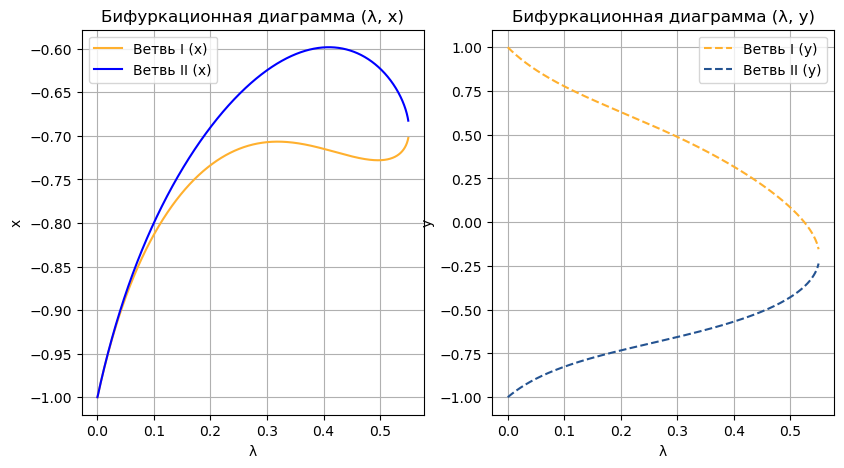

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(lam_I, x_I, '-',color='#ffb02e', label='Ветвь I (x)')
plt.plot(lam_II, x_II, 'b-', label='Ветвь II (x)')
plt.xlabel('λ')
plt.ylabel('x')
plt.title('Бифуркационная диаграмма (λ, x)')
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(lam_I, y_I, '--', color='#ffb02e',label='Ветвь I (y)')
plt.plot(lam_II, y_II, '--', color="#245391", label='Ветвь II (y)')
plt.xlabel('λ')
plt.ylabel('y')
plt.title('Бифуркационная диаграмма (λ, y)')
plt.legend()
plt.grid()

def print_table(lam_values, x_values, y_values, det_values, title):
    print(f"\n{title}")
    table = []
    step_idx = max(1, len(lam_values) // 400)
    for i in range(0, len(lam_values), step_idx):
        table.append([lam_values[i], x_values[i], y_values[i], det_values[i]])
    print(tabulate(table, headers=["λ", "x", "y", "det(J)"], floatfmt=".6f"))

print_table(lam_I, x_I, y_I, det_I, "Таблица 3.1. Ветвь I:")
print_table(lam_II, x_II, y_II, det_II, "Таблица 3.2. Ветвь II:")